## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### Package load

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

### Datasets load

In [26]:
def load_dataset():
  '''
  Load datasets for Bostom House Price
  '''
  boston = load_boston()

  # boston datasets
  boston_df = pd.DataFrame(data = boston.data, columns=boston.feature_names)
  boston_df['PRICE'] = boston.target
  return boston_df

In [27]:
boston_df = load_dataset()

In [28]:
# (506, 14)
display(boston_df.shape, boston_df.head(5))

(506, 14)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Feature Description

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

### Visualization
* 각 컬럼별로 주택가격에 미치는 영향도 조사(`regplot`)

In [37]:
def show_regplot(features: list, df):
  '''
  show feature influence on house price
  '''
  # 2개의 행과 5개의 열을 가진 subplots를 이용. axs는 5x2개의 ax를 가짐.
  fig, axs = plt.subplots(figsize=(16, 8), ncols=5, nrows=2)

  for i, feature in enumerate(features):
    row = int(i/5) # 몫만 리턴
    col = i % 5    # 나머지를 리턴

    #display(row, col)
    # 시본의 regplot을 이용해 산점도와 선형 회귀직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data = df, ax = axs[row][col])

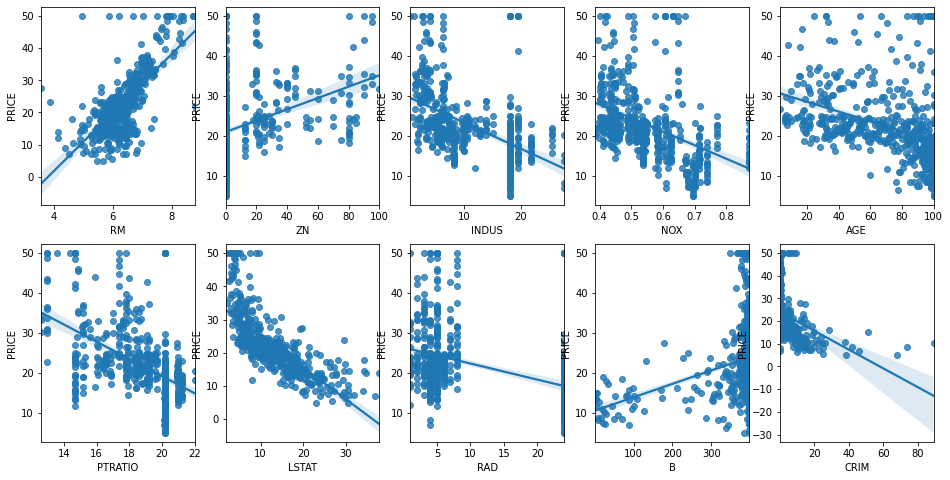

In [38]:
# African-american거주비율 및 범죄발생률 추가
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD', 'B', 'CRIM']
show_regplot(lm_features, boston_df)

### Fit, Prediction  and Evaluation

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error    # MAE

In [65]:
def model_fit_pred_evl(df):
  '''
  Model fit, predict and Evaluation for LinearRegression
  return  - estimator
  '''
  X_data = df.drop(['PRICE'], axis=1, inplace=False)
  y_target = df['PRICE']

  X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=.3, random_state=156)

  # LogisticRegression으로 학습, 예측, 평가 수행
  lr = LinearRegression(n_jobs=1)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)

  # mean absolute error
  mse = mean_absolute_error(y_test, y_pred=y_pred)

  # Root Mean Squared Error - RMSE
  rmse = np.sqrt(mse)

  print("Mean Squared Error : {0:.4f}, Root Mean Squared Error : {1:.4f}".format(mse, rmse))
  print("Variance Score : {0:.4f}".format(r2_score(y_test, y_pred)))   # R2 Score
  return lr

In [66]:
esitmator = model_fit_pred_evl(boston_df)

Mean Squared Error : 3.2137, Root Mean Squared Error : 1.7927
Variance Score : 0.7572


In [63]:
print('절편 값:',esitmator.intercept_)
print('회귀 계수값:', np.round(esitmator.coef_, 1))

절편 값: 40.995595172164755
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


절편 값: 40.995595172164755

회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]

In [68]:
X_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [71]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data = np.round(esitmator.coef_, 1), index= X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

* African-american의 거주비율은 시각화에서 보듯 집값에 큰 변수는 아님.
* `LSTAT - 하층민 거주비율`, `CRIM(범죄율)`이 상대적으로 집값에 영향을 주는 변수로 보임.(어딜 가나 똑같네..ㅠㅠ)
* `NOX` 피처의 값이 굉장히 크다보니 이 값에 따라 예측 오류값이 분산이 커질것으로 판단됨.

In [97]:
def get_cross_val_score(df, cv=5):
  from sklearn.model_selection import cross_val_score
  '''
  get cross validation score
  '''
  y_target = df['PRICE']
  X_data = df.drop(['PRICE'], axis = 1, inplace = False)

  lr_clf = LinearRegression()

  # cross_val_score()로 교차검증 셋 - 인자로 넘어온 값 - 으로 MSE를 구한뒤 이를 기반으로 다시 RMSE구함
  neg_mse_scores = cross_val_score(lr_clf, X_data, y_target, scoring='neg_mean_squared_error', cv = cv, verbose=True, n_jobs=-1)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)

  print(' {0} folds 의 개별 Negative MSE scores: {1}'.format(cv, np.round(neg_mse_scores, 2)))
  print(' {0} folds 의 개별 RMSE scores : {1} '.format(cv, np.round(rmse_scores, 2)))
  print(' {0} folds 의 평균 RMSE : {1} '.format(cv, avg_rmse))

In [98]:
get_cross_val_score(boston_df, cv=5)

 5 folds 의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77] 
 5 folds 의 평균 RMSE : 5.828658946215802 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [99]:
get_cross_val_score(boston_df, cv=10)

 10 folds 의 개별 Negative MSE scores: [  -9.29  -14.15  -14.07  -35.21  -31.89  -19.84   -9.95 -168.38  -33.33
  -10.96]
 10 folds 의 개별 RMSE scores : [ 3.05  3.76  3.75  5.93  5.65  4.45  3.15 12.98  5.77  3.31] 
 10 folds 의 평균 RMSE : 5.180845679340257 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
